<h2>  Принятие решений в бизнесе  <a class="tocSkip"></h2

<h5>  Заказчик : Интернет магазин  <a class="tocSkip"></h5
    

<h5>  Цель иследования:  <a class="tocSkip"></h5

Необходимость приоритизировать гипотезы из списка гипотез, предоставленных отделом Маркетинга;

Анализа результатов проведенного А/В-тестирования и аргументация решения по результатам теста.
Варианты решений:

Остановить тест, зафиксировать победу одной из групп.

Остановить тест, зафиксировать отсутствие различий между группами.

Продолжить тест.


<h5>  Входные данные:  <a class="tocSkip"></h5

Список гипотез (файл hypothesis.csv)

Hypothesis — краткое описание гипотезы;

Reach — охват пользователей по 10-балльной шкале;

Impact — влияние на пользователей по 10-балльной шкале;

Confidence — уверенность в гипотезе по 10-балльной шкале;

Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале.



Информация о заказах пользователей в интернет-магазине (файл orders.csv.)

transactionId — идентификатор заказа;

visitorId — идентификатор пользователя, совершившего заказ;

date — дата, когда был совершён заказ;

revenue — выручка заказа;

group — группа A/B-теста, в которую попал заказ.



Информация о посещениях пользователями интернет-магазина (файл visitors.csv)

date — дата;

group — группа A/B-теста;

visitors — количество пользователей в указанную дату в указанной группе A/B-теста.


<h2>  Импорт библиотек  <a class="tocSkip"></h2

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import datetime as dt
import scipy.stats as stats
import warnings

pd.set_option('display.max_columns', None)

pd.set_option('display.max_colwidth', None)

<h2> 1. Загрузка и просмотр данных  <a class="tocSkip"></h2

In [46]:
hypothesis, orders, visitors = (
        pd.read_csv('/datasets/hypothesis.csv'),
        pd.read_csv('/datasets/orders.csv'),
        pd.read_csv('/datasets/visitors.csv')
    )

In [47]:
hypothesis.info()
hypothesis

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [48]:
orders.info()
orders

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


In [49]:
visitors.info()
visitors

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


Познакомились с таблицами. На первый взгляд, пропусков нет, yужно изменить тип данных в столбцах date. Так же нужно привести наименования столбцов к единому стилю.

<h2> 2. Предобработка  данных  <a class="tocSkip"></h2

<h5> 2.1 Приводим названия столбцов к нижнему регистру  <a class="tocSkip"></h5

In [50]:
hypothesis.columns = hypothesis.columns.str.lower()
orders.columns = [name.replace('Id', '_id') for name in orders.columns]

display(hypothesis.columns)
orders.columns

Index(['hypothesis', 'reach', 'impact', 'confidence', 'efforts'], dtype='object')

Index(['transaction_id', 'visitor_id', 'date', 'revenue', 'group'], dtype='object')

<h5>2.2 Преобразование типов данных  <a class="tocSkip"></h5

In [51]:
visitors['date'] = pd.to_datetime(visitors['date'])
orders['date'] = pd.to_datetime(orders['date'])
visitors.info()
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  1197 non-null   int64         
 1   visitor_id      1197 non-null   int64         
 2   date            1197 non-null   datetime64[ns]
 3   revenue         1197 non-null   int64         
 4   group           1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


<h5>2.3 Поиск  дубликатов <a class="tocSkip"></h5

In [52]:
display(visitors.duplicated().sum())
display(orders.duplicated().sum())


0

0

<h2> Часть 1.Приоритизация гипотез <a class="tocSkip"></h2

<h5> 1.1 Применение фреймворка ICE для приоритизации гипотез  <a class="tocSkip"></h5

In [53]:
hypothesis['ice'] = hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']
hypothesis.sort_values(by='ice', ascending=False)

,hypothesis,reach,impact,confidence,efforts,ice
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000000


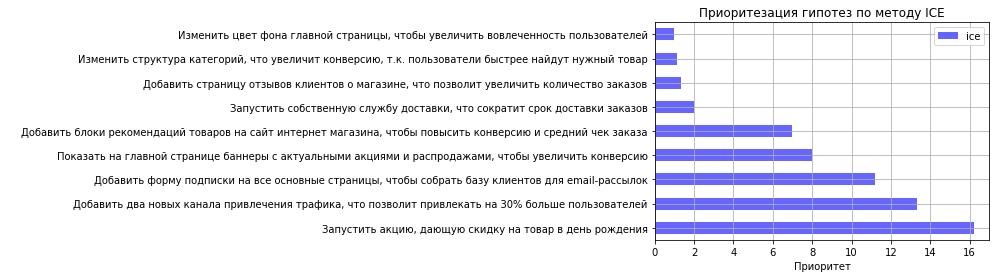

In [54]:
ax = (hypothesis[['hypothesis', 'ice']]
      .set_index('hypothesis')
      .sort_values('ice', ascending=False)
      .plot(kind='barh', color='b', alpha=0.6)
     )
ax.grid(True)
ax.set_xlabel('Приоритет')
ax.set_ylabel(' ')
ax.set_title('Приоритезация гипотез по методу ICE', loc='center')
plt.show()

Из полученых результатов мы видим что есть как минимум 3 гипотезы которым стоит уделить внимание

<h5> 1.2 Применение фреймворка RICE для приоритизации гипотез  <a class="tocSkip"></h5

In [55]:
hypothesis['rice'] = hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']
hypothesis.sort_values(by='rice',ascending=False)

,hypothesis,reach,impact,confidence,efforts,ice,rice
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200000,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000000,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333333,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000000,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200000,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125000,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000000,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.333333,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000000,3.0


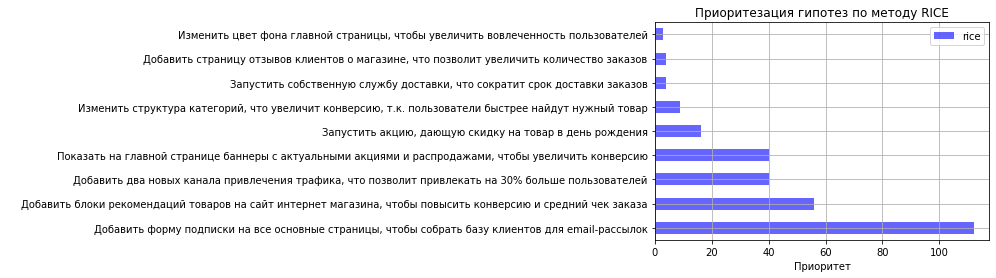

In [56]:
ax = (hypothesis[['hypothesis', 'rice']]
      .set_index('hypothesis')
      .sort_values('rice', ascending=False)
      .plot(kind='barh', color='b', alpha=0.6)
     )
ax.grid(True)
ax.set_xlabel('Приоритет')
ax.set_ylabel(' ')
ax.set_title('Приоритезация гипотез по методу RICE', loc='center')
plt.show()

Мы видим все те же гипотезы только в другой последовательности.
Метод RICE (который включет в себя охват(Reach), позволяет учитывать потенциальное кол-во пользователей, метод ICE более сфокусирован на влиянии и уверенности.

<h2> Часть 2. Анализ A/B-теста <a class="tocSkip"></h2

<h5> 2.0  Подготовка данных  <a class="tocSkip"></h5

In [57]:
dates_grouped = orders[['date', 'group']].drop_duplicates()


orders_grouped = dates_grouped.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transaction_id': 'nunique',
            'visitor_id': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

orders_grouped

,date,group,transaction_id,visitor_id,revenue
55,2019-08-01,A,24,20,148579
66,2019-08-01,B,21,20,101217
175,2019-08-02,A,44,38,242401
173,2019-08-02,B,45,43,266748
291,2019-08-03,A,68,62,354874
...,...,...,...,...,...
496,2019-08-29,B,596,544,5559398
730,2019-08-30,A,545,493,4022970
690,2019-08-30,B,620,567,5774631
958,2019-08-31,A,557,503,4084803


In [58]:
visitors_grouped = dates_grouped.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max', 
            'group': 'max', 
            'visitors': 'sum'
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

visitors_grouped

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845
...,...,...,...
496,2019-08-29,B,17708
730,2019-08-30,A,18037
690,2019-08-30,B,18198
958,2019-08-31,A,18736


In [59]:
cumulative_data = orders_grouped.merge(
    visitors_grouped, 
    left_on=['date', 'group'], 
    right_on=['date', 'group']
)

cumulative_data.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

In [60]:
cumulative_data['conversion'] = cumulative_data['orders'] / cumulative_data['visitors']
cumulative_data

,date,group,orders,buyers,revenue,visitors,conversion
0,2019-08-01,A,24,20,148579,719,0.033380
1,2019-08-01,B,21,20,101217,713,0.029453
2,2019-08-02,A,44,38,242401,1338,0.032885
3,2019-08-02,B,45,43,266748,1294,0.034776
4,2019-08-03,A,68,62,354874,1845,0.036856
...,...,...,...,...,...,...,...
57,2019-08-29,B,596,544,5559398,17708,0.033657
58,2019-08-30,A,545,493,4022970,18037,0.030216
59,2019-08-30,B,620,567,5774631,18198,0.034070
60,2019-08-31,A,557,503,4084803,18736,0.029729


<h5> 2.1  Построим график кумулятивной выручки по группам  <a class="tocSkip"></h5

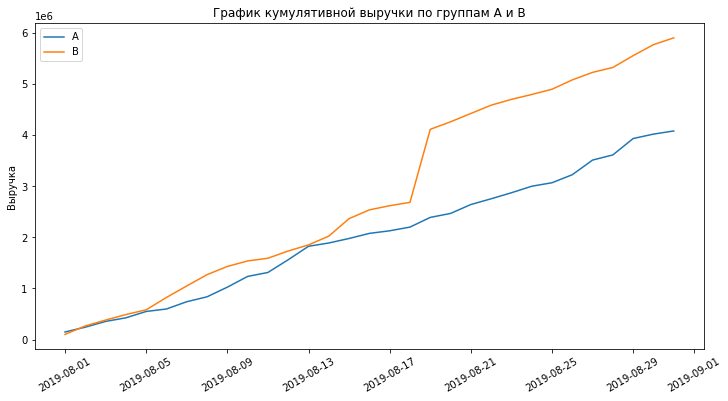

In [61]:
cumulative_revenue_a = cumulative_data[cumulative_data['group']=='A'][['date','revenue', 'orders']]


cumulative_revenue_b = cumulative_data[cumulative_data['group']=='B'][['date','revenue', 'orders']]
plt.figure(figsize=(12, 6))
plt.plot(cumulative_revenue_a['date'], cumulative_revenue_a['revenue'], label='A')
plt.plot(cumulative_revenue_b['date'], cumulative_revenue_b['revenue'], label='B')
plt.title('График кумулятивной выручки по группам А и В')
plt.ylabel("Выручка")
plt.xticks(rotation=30)
plt.legend()
plt.show()

Исходя из графика делаем вывод, что кумулятивная выручка группы А меньше, чем у группы В.
Так жев группе В есть резкий скачок в районе 18-го августа, что может говорить о увеличении числа заказов или может быть о появлении очень дорогих заказов в выборке.

<h5> 2.2 Построим график кумулятивного среднего чека по группам  <a class="tocSkip"></h5

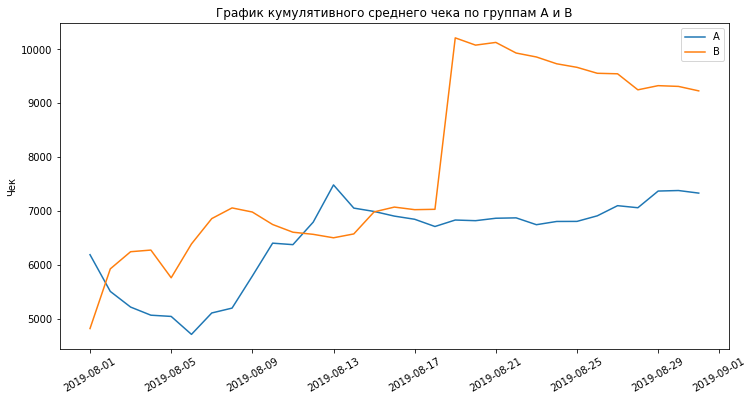

In [62]:
plt.figure(figsize=(12, 6))
plt.plot(cumulative_revenue_a['date'], 
         cumulative_revenue_a['revenue'] / cumulative_revenue_a['orders'],
         label='A')

plt.plot(cumulative_revenue_b['date'], 
         cumulative_revenue_b['revenue'] / cumulative_revenue_b['orders'], 
         label='B')

plt.title('График кумулятивного среднего чека по группам А и В')
plt.ylabel("Чек")
plt.xticks(rotation=30)
plt.legend()

plt.show()

Пографику видно, что средний чек в группе А через какое-то стал показывать более стабильные показания. Средний чек группы В показал резкий скачек, что  может говорить в пользу версии о очень дорогих заказах.

<h5> 2.3  Построим график относительного изменения кумулятивного среднего чека группы B к группе A. <a class="tocSkip"></h5

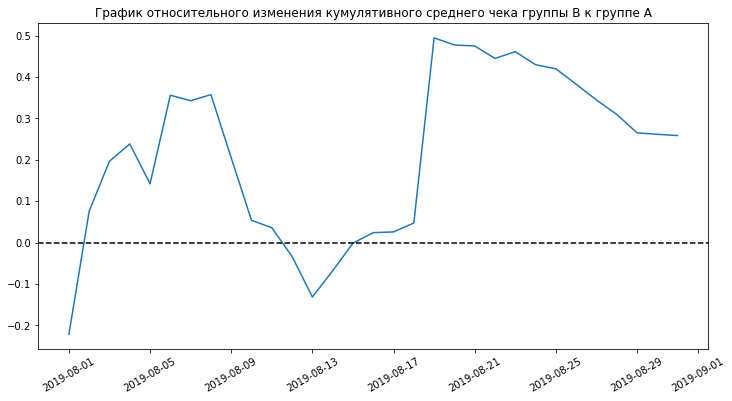

In [63]:
cumulative_revenue_ab = cumulative_revenue_a.merge(
    cumulative_revenue_b, 
    left_on='date', 
    right_on='date', 
    how='left', 
    suffixes=['_a', '_b']
)

plt.figure(figsize=(12, 6))
plt.plot(cumulative_revenue_ab['date'], 
         (
             cumulative_revenue_ab['revenue_b']/cumulative_revenue_ab['orders_b']
         )/
         (
             cumulative_revenue_ab['revenue_a']/cumulative_revenue_ab['orders_a']
         )-1
        )


plt.axhline(y=0, color='black', linestyle='--')
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.xticks(rotation=30)
plt.show()

На графике видны резкие колебания в нескольких местах, что может указывать на наличие выбросов и значительных заказов.

<h5> 2.4 Построим график кумулятивного среднего количества заказов на посетителя по группам.  <a class="tocSkip"></h5

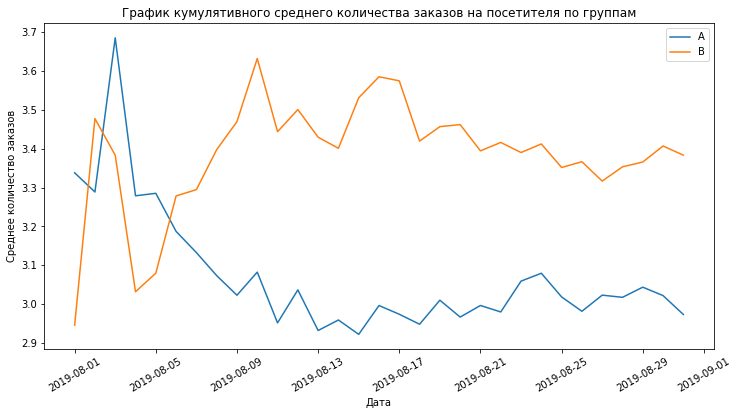

In [64]:
cumulative_data_a = cumulative_data[cumulative_data['group']=='A']
cumulative_data_b = cumulative_data[cumulative_data['group']=='B']

plt.figure(figsize=(12,6))
plt.plot(cumulative_data_a['date'], cumulative_data_a['conversion']*100, label='A')
plt.plot(cumulative_data_b['date'], cumulative_data_b['conversion']*100, label='B')
plt.legend()
plt.title('График кумулятивного среднего количества заказов на посетителя по группам')
plt.xlabel('Дата')
plt.ylabel('Среднее количество заказов')
plt.xticks(rotation=30)
plt.show()

На начало теста сегмент А имел конверсию выше чем сегмент В, после небольшого промежутка времени конверсия выровнелась и сегмент В стал выглядеть более превликательным.

<h5> 2.5 Построим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A.  <a class="tocSkip"></h5

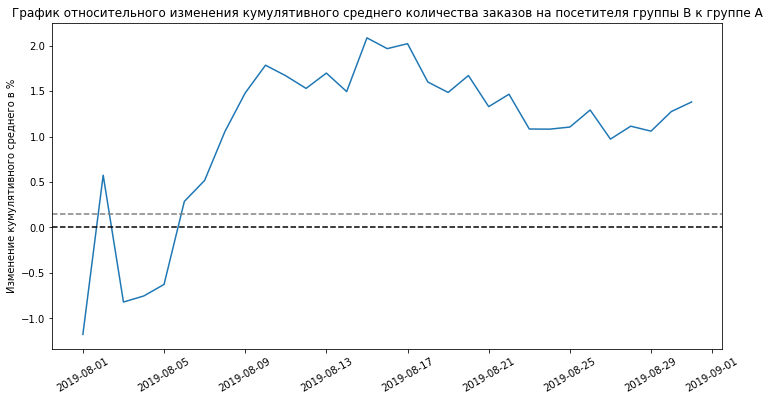

In [65]:
cumulative_conversions_ab = (
    cumulative_data_a[['date','conversion']]
    .merge(
        cumulative_data_b[['date','conversion']], 
        left_on='date', 
        right_on='date', 
        how='left', 
        suffixes=['_a', '_b']
    )
)
plt.figure(figsize=(12,6))
plt.plot(
    cumulative_conversions_ab['date'], 
    cumulative_conversions_ab['conversion_b']/
    cumulative_conversions_ab['conversion_a']*10-10
)


plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.15, color='grey', linestyle='--')
plt.title('График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A')
plt.xlabel('')
plt.ylabel('Изменение кумулятивного среднего в %')
plt.xticks(rotation=30)
plt.show()

В начале теста группа В проигрывала группе А, после вырвалась вперед, произошел стремительный рост, пик приходиться на 2019-08-17, далее наблюдаеться медленный спад.

<h5> 2.6 Построим точечный график количества заказов по пользователям  <a class="tocSkip"></h5

In [66]:
orders_by_users = (
    orders.groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'nunique'})
)
orders_by_users.columns =  ['visitor_id', 'orders']
orders_by_users

,visitor_id,orders
0,5114589,1
1,6958315,1
2,8300375,2
3,11685486,1
4,39475350,1
...,...,...
1026,4266935830,2
1027,4278982564,1
1028,4279090005,1
1029,4281247801,1


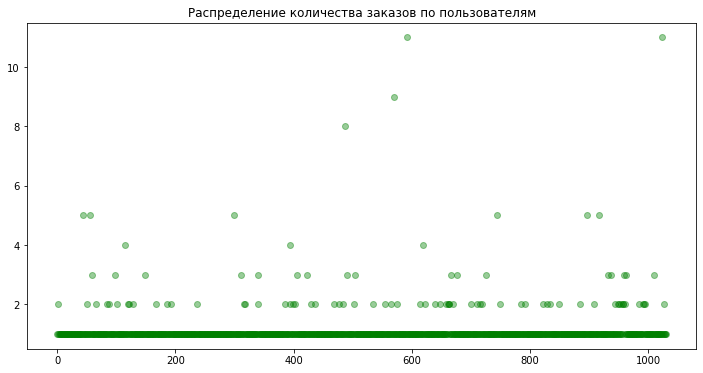

In [67]:
x_values = pd.Series(range(0,len(orders_by_users)))

plt.figure(figsize=(12,6))
plt.scatter(x_values, orders_by_users['orders'], color='green', alpha=0.4)
plt.title('Распределение количества заказов по пользователям')
plt.show()

<h5> 2.7 Считаем 95-й и 99-й перцентили количества заказов на пользователя.  <a class="tocSkip"></h5

In [68]:
np.percentile(orders_by_users['orders'], [95, 99])

array([2., 4.])

Не более 5% пользователей совершали больше 2-х покупок в течение тестирования. И только 1% - четыре и более.
Примем за верхнюю границу 4 заказа на одного пользователя.

<h5> 2.8 Строим точечный график стоимостей заказов  <a class="tocSkip"></h5

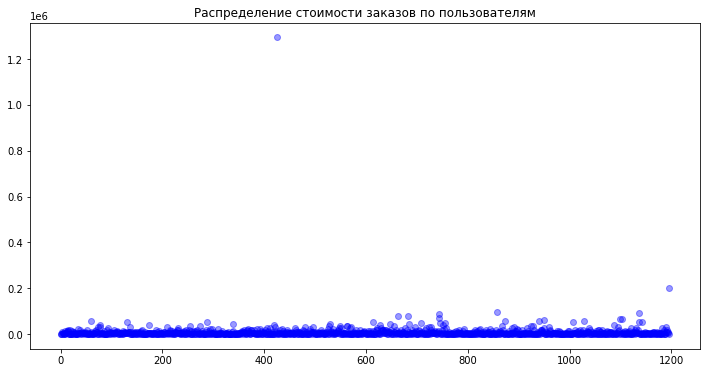

In [69]:
x_values = pd.Series(range(0,len(orders['revenue'])))

plt.figure(figsize=(12,6))
plt.scatter(x_values, orders['revenue'], color='b', alpha=0.4)
plt.title('Распределение стоимости заказов по пользователям')
plt.show()

Наблюдаю 1 очень большой заказ почти 1.3 млн, который мог вызвать всплеск на предыдущих графиках, так же присутствуют другие большие заказы, которые могут повлиять на результат исследований.

<h5> 2.9 Посчитаем 95-й и 99-й перцентили стоимости заказов  <a class="tocSkip"></h5

In [70]:
display(np.percentile(orders['revenue'], [95, 99]))

array([28000. , 58233.2])

Определил границу по 99% перцентилю(58233)

<h5> 2.10 Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным.<a class="tocSkip"></h5

H_0: Среднее количество заказов на посетителя в группе A по неподготовленным данным = среднему количеству заказов на посетителя в группе B по неподготовленным данным.

H_1: Среднее количество заказов на посетителя в группе A по неподготовленным данным ≠ среднему количеству заказов на посетителя в группе B по неподготовленным данным.



Данные о продажах и средних чеках часто бывают далеки от нормального распределения. Как я понимаю это довольно распространненая  ситуация в бизнесе, где могут наблюдаться выбросы, такие как аномально высокие или низкие значения, которые могут исказить результаты анализа(как в нашем случае).

В связи с этим для проверки гипотез мы будем применять непараметрический тест Уилкоксона-Манна-Уитни. Этот тест не требует выполнения условий нормальности распределения и подходит для сравнения двух независимых выборок. Он оценивает, существуют ли статистически значимые различия между медианами двух групп, что делает его более устойчивым к влиянию выбросов и аномалий в данных.


In [71]:
visitors_daily_a = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitors_daily_a.columns = ['date', 'visitors_per_date_a']

visitors_cummulative_a = visitors_daily_a.apply(
    lambda x: visitors_daily_a[visitors_daily_a['date'] <= x['date']].agg(
        {'date': 'max', 'visitors_per_date_a': 'sum'}
    ),
    axis=1,
)
visitors_cummulative_a.columns = ['date', 'visitors_cummulative_a']

visitors_daily_b = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitors_daily_b.columns = ['date', 'visitors_per_date_b']

visitors_cummulative_b = visitors_daily_b.apply(
    lambda x: visitors_daily_b[visitors_daily_b['date'] <= x['date']].agg(
        {'date': 'max', 'visitors_per_date_b': 'sum'}
    ),
    axis=1,
)
visitors_cummulative_b.columns = ['date', 'visitors_cummulative_b']

orders_daily_a = (
    orders[orders['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
orders_daily_a.columns = ['date', 'orders_daily_a', 'revenue_per_date_a']

orders_cummulative_a = orders_daily_a.apply(
    lambda x: orders_daily_a[orders_daily_a['date'] <= x['date']].agg(
        {'date': 'max', 'orders_daily_a': 'sum', 'revenue_per_date_a': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])

orders_cummulative_a.columns = ['date','orders_cummulative_a','revenue_cummulative_a']

orders_daily_b = (
    orders[orders['group'] == 'B'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
orders_daily_b.columns = ['date', 'orders_daily_b', 'revenue_per_date_b']

orders_cummulative_b = orders_daily_b.apply(
    lambda x: orders_daily_b[orders_daily_b['date'] <= x['date']].agg(
        {'date': 'max', 'orders_daily_b': 'sum', 'revenue_per_date_b': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])

orders_cummulative_b.columns = ['date','orders_cummulative_b','revenue_cummulative_b']


data = (
    orders_daily_a.merge(
        orders_daily_b, left_on='date', right_on='date', how='left'
    )
    .merge(orders_cummulative_a, left_on='date', right_on='date', how='left')
    .merge(orders_cummulative_b, left_on='date', right_on='date', how='left')
    .merge(visitors_daily_a, left_on='date', right_on='date', how='left')
    .merge(visitors_daily_b, left_on='date', right_on='date', how='left')
    .merge(visitors_cummulative_a, left_on='date', right_on='date', how='left')
    .merge(visitors_cummulative_b, left_on='date', right_on='date', how='left')
)

orders_by_users_a = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
orders_by_users_a.columns = ['visitor_id', 'orders']

orders_by_users_b = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
orders_by_users_b.columns = ['visitor_id', 'orders']

sample_a = pd.concat([orders_by_users_a['orders'],
                      pd.Series(
                          0, 
                          index=np.arange(data['visitors_per_date_a'].sum() - 
                                          len(orders_by_users_a['orders'])), 
                          name='orders')],axis=0
                    )

sample_b = pd.concat([orders_by_users_b['orders'],
                      pd.Series(
                          0, 
                          index=np.arange(data['visitors_per_date_b'].sum() - 
                                          len(orders_by_users_b['orders'])), 
                          name='orders')],axis=0
                    )

def stat_significance(data_a, data_b):
    alpha = 0.05
    p_value = stats.mannwhitneyu(data_a, data_b)[1]
    print("P-value: {0:.5f}".format(p_value))

    if (p_value < alpha):
        print("Отвергаем нулевую гипотезу: между группами есть разница")
    else:
        print("Не получилось отвергнуть нулевую гипотезу, нет оснований считать группы разными")
    
    print("Относительный прирост В к А: {0:.3%}".format(data_b.mean() / data_a.mean()-1))
    
stat_significance(sample_a, sample_b)    

P-value: 0.01679
Отвергаем нулевую гипотезу: между группами есть разница
Относительный прирост В к А: 13.808%


P-value меньше 0,05. Отвергаем нулевю гипотезу. Анализ неподготовленных данных говорит о наличии статистически значимых различий в среднем количестве транзакций между группами. Относительный прирост среднего группы B к конверсии группы A равен 13,8%. 

<h5> 2.11 Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным.  <a class="tocSkip"></h5

H_0: Средний чек заказа в группе A по неподготовленным данным = среднему чеку заказа в группе B по неподготовленным данным.

H_1: Средний чек заказа в группе A по неподготовленным данным ≠ среднему чеку заказа в группе B по неподготовленным данным.

In [72]:
stat_significance(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])

P-value: 0.72929
Не получилось отвергнуть нулевую гипотезу, нет оснований считать группы разными
Относительный прирост В к А: 25.871%


P-value  больше 0.05. Значит, причин отвергать нулевую гипотезу нет. По неподготовленным данным средний чек группы B значительно выше среднего чека группы A.

<h5> 2.12 Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным.   <a class="tocSkip"></h5

In [73]:
many_orders = np.percentile(orders_by_users['orders'], 99)
expensive_orders = np.percentile(orders['revenue'], 99)


users_with_many_orders = pd.concat(
    [
        orders_by_users_a[orders_by_users_a['orders'] > many_orders]['visitor_id'],
        orders_by_users_b[orders_by_users_b['orders'] > many_orders]['visitor_id'],
    ],
    axis=0,
)


users_with_expensive_orders = orders[orders['revenue'] > expensive_orders]['visitor_id']


abnormal_users = (
    pd.concat([users_with_many_orders, users_with_expensive_orders], axis=0)
    .drop_duplicates()
    .sort_values()
)
display(abnormal_users.head(5))
abnormal_users.shape[0]

1099     148427295
949      887908475
744      888512513
1103    1164614297
1136    1307669133
Name: visitor_id, dtype: int64

15

Имеются 15 аномальных пользователей, посчитаем статистическую значимость.

In [74]:
sample_a_filtered = pd.concat(
    [
        orders_by_users_a[
            np.logical_not(orders_by_users_a['visitor_id'].isin(abnormal_users))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitors_per_date_a'].sum() - len(orders_by_users_a['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sample_b_filtered = pd.concat(
    [
        orders_by_users_b[
            np.logical_not(orders_by_users_b['visitor_id'].isin(abnormal_users))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitors_per_date_b'].sum() - len(orders_by_users_b['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

stat_significance(sample_a_filtered, sample_b_filtered)

P-value: 0.01438
Отвергаем нулевую гипотезу: между группами есть разница
Относительный прирост В к А: 15.331%


По очищенным данным разница в конверсии между группами есть, а относительный прирост конверсии группы В отнистельно группы А увеличился на 15.3%.

<h5> 2.13 Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным <a class="tocSkip"></h5

In [75]:
stat_significance(
    orders[(orders['group']=='A') & np.logical_not(orders['visitor_id'].isin(abnormal_users))]['revenue'], 
    orders[(orders['group']=='B') & np.logical_not(orders['visitor_id'].isin(abnormal_users))]['revenue']
                  )

P-value: 0.85091
Не получилось отвергнуть нулевую гипотезу, нет оснований считать группы разными
Относительный прирост В к А: -0.575%


Значение P-value разительно больше  0.05. Исходя из этого, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. По разнице средних чеков групп различий практически нет.

<h2> Вывод: <a class="tocSkip"></h2

Исходя из проведенногоанализа, тест следует остановить и признать его успешным.

Часть 1. Приоритизация гипотез.

В части приоритизации гипотез из списка, предоставленных отделом Маркетинга  с прмеинением метода приоритизации гипотез ICE следует обратить внимание на гипотезы:

"Запустить акцию, дающую скидку на товар в день рождения",

"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",

"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок";

С применением метода приоритизации гипотез RICE т.е включающее в себя и охват пользователей:

"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",

"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",

"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей".

Часть 2. Анализ A/B-теста.

Исходя из проведенного анализа данных можно говорить о наличии статистически значимых различий в среднем количестве транзакций между группами как по сырым, так и по очищенным данным. Т.е. среднее количество заказов на посетителя в группе B статистически значимо.

Отсутствие статестически значимых различий в среднем чеке заказа между группами по сырым и очищенным данным.При этом относительное различие среднего чека между сегментами практически пропало после очистки данных от аномалий (разница ссоставляет ~ 2%).

На основании вышеизложенного рекомендуем остановить тест, зафиксировав победу группы B.
